In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing/manipulation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords


In [20]:
data = pd.read_csv('1429_1.csv')
data.head()

/Users/akshatgaur/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [21]:
data.shape

(34660, 21)

In [22]:
data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [23]:
review=pd.DataFrame(data.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [24]:
data1 = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
final = data1.dropna()
final.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [25]:
fact =  final[final["reviews.text"].isnull()]
fact.head()

,reviews.rating,reviews.text,reviews.title,reviews.username


In [26]:
rating = final[(final['reviews.rating'] == 1) | (final['reviews.rating'] == 5)]
rating.shape

(24178, 4)

In [27]:
y = rating['reviews.rating']
x = rating['reviews.text'].reset_index()

In [28]:
len(y)

24178

In [29]:
X = x['reviews.text']
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24173    This is exactly like any other usb power charg...
24174    Amazon should include this charger with the Ki...
24175    Love my Kindle Fire but I am really disappoint...
24176    I was surprised to find it did not come with a...
24177    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24178, dtype: object


In [30]:
print(len(X))

24178


In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshatgaur/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [34]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 
  
text = 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already....'
lemmatize_word(text) 

['Inexpensive',
 'tablet',
 'for',
 'him',
 'to',
 'use',
 'and',
 'learn',
 'on',
 ',',
 'step',
 'up',
 'from',
 'the',
 'NABI',
 '.',
 'He',
 'be',
 'thrill',
 'with',
 'it',
 ',',
 'learn',
 'how',
 'to',
 'Skype',
 'on',
 'it',
 'already',
 '....']

In [35]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
  
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
import nltk
nltk.download('stopwords') #To downlaod 'stopwords' in your notebook
sample_text = ("Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already....")
print(text_process(sample_text))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshatgaur/nltk_data...


['Inexpensive', 'tablet', 'use', 'learn', 'step', 'NABI', 'thrilled', 'learn', 'Skype', 'already']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

transformer = CountVectorizer(analyzer=text_process).fit(X)

In [38]:
transformer.vocabulary_

{'product': 12866,
 'far': 8433,
 'disappointed': 7499,
 'children': 6383,
 'love': 10980,
 'use': 16158,
 'like': 10807,
 'ability': 4581,
 'monitor': 11407,
 'control': 6832,
 'content': 6806,
 'see': 14047,
 'ease': 7830,
 'great': 9287,
 'beginner': 5610,
 'experienced': 8306,
 'person': 12391,
 'Bought': 993,
 'gift': 9053,
 'loves': 10985,
 'Inexpensive': 2321,
 'tablet': 15195,
 'learn': 10669,
 'step': 14835,
 'NABI': 2881,
 'thrilled': 15552,
 'Skype': 3796,
 'already': 4970,
 'bought': 5875,
 'grand': 9228,
 'daughter': 7131,
 'comes': 6573,
 'visit': 16348,
 'set': 14145,
 'user': 16212,
 'entered': 8054,
 'age': 4846,
 'name': 11593,
 'Amazon': 700,
 'makes': 11063,
 'sure': 15106,
 'accesses': 4626,
 'sites': 14379,
 'appropriate': 5176,
 'Simple': 3764,
 'capabilities': 6158,
 'also': 4973,
 'installed': 10102,
 '64gig': 375,
 'SD': 3568,
 'card': 6181,
 'gives': 9093,
 'little': 10872,
 'plenty': 12560,
 'storage': 14888,
 'price': 12762,
 'think': 15513,
 'best': 5650,


In [39]:
print(transformer)

CountVectorizer(analyzer=<function text_process at 0x7fe9ef295a60>)


In [40]:
len(transformer.vocabulary_)

16954

In [41]:
review = X[24]
bow = transformer.transform([review])
bow

<1x16954 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [42]:
print(bow)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [43]:
X = transformer.transform(X)

In [44]:
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [46]:
pred = naive.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print('\n')

print(classification_report(y_test, pred))
naive.score(X_train, y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.20      0.11      0.14       117
         5.0       0.99      0.99      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.59      0.55      0.57      7254
weighted avg       0.97      0.98      0.98      7254



0.9839872370597967

In [48]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
svm = clf.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, svm))
svm = clf.predict(X_test)
clf.score(X_train,y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



/Users/akshatgaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshatgaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akshatgaur/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9908414086504372

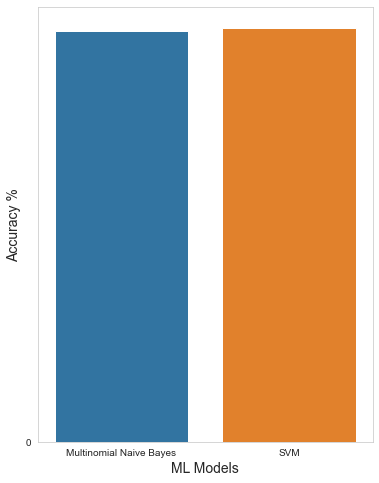

In [50]:
methods = ["Multinomial Naive Bayes","SVM"]
accuracy = [0.9839,0.9908]
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=14)
plt.xlabel("ML Models",fontsize=14)
sns.barplot(x=methods, y=accuracy)
plt.show()